In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
data = pd.read_csv('data.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [196]:
#Definding our x and y values respectively

x = data.drop(['Outcome'],axis =1)
y = data['Outcome']

In [197]:
#Converting to numpy array to feed into model

x = x.to_numpy()
y = y.to_numpy()

print("Shape of x: ",x.shape)
print("Shape of y: ",y.shape)


Shape of x:  (768, 8)
Shape of y:  (768,)


In [198]:
#Seperating data into training testing and validation set 70:20:10 (train:test:val)

train = int(0.7*768)
test = int(0.2*768)+1
val = 768 - train - test 

train_x = x[0:train]
train_y = y[0:train]

test_x = x[train:test+train]
test_y = y[train:test+train]

val_x = x[train+test:]
val_y = x[train+test:]


In [225]:
#Definding functionality for logistic regression

class LogisticRegression:

    def __init__(self,x,y,learning_rate,epochs):
        self.x = x
        self.y = y
        self.learning_rate = learning_rate
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.epochs = epochs
        self.n = x.shape[1] # number of data points
        self.loss = []

    def sigmoid(self,z):
        return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

    
    def forward_pass(self):
        z = np.dot(self.x,self.w) + self.b
        predictions = self.sigmoid(z)
        return predictions

    def binary_cross_entropy(self, pred):
        loss = - (self.y * np.log(pred + 1e-9) + (1 - self.y) * np.log(1 - pred + 1e-9))
        return np.mean(loss)
    
    def fit(self):

        for epoch in range(self.epochs):
            predictions = self.forward_pass()
            dw = (1/self.n)*np.dot(self.x.T,(predictions-self.y))
            db = (1/self.n)*np.sum(predictions-self.y)

            
            self.w -= self.learning_rate*dw
            self.b -= self.learning_rate*db
            
            l = self.binary_cross_entropy(predictions)
            self.loss.append(l)

            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {l:.4f}, Learning Rate: {self.learning_rate:.6f}")

    def predict(self, data):
        z = np.dot(data, self.w) + self.b
        predictions = self.sigmoid(z)
        return np.where(predictions >= 0.5, 1, 0)
    
        

    
            
            

        

In [226]:
lr = LogisticRegression(train_x,train_y,0.001,1000)

lr.fit()

Epoch 1/1000, Loss: 13.4296, Learning Rate: 0.001000
Epoch 2/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 3/1000, Loss: 8.4845, Learning Rate: 0.001000
Epoch 4/1000, Loss: 7.2824, Learning Rate: 0.001000
Epoch 5/1000, Loss: 13.4296, Learning Rate: 0.001000
Epoch 6/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 7/1000, Loss: 13.1378, Learning Rate: 0.001000
Epoch 8/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 9/1000, Loss: 7.2653, Learning Rate: 0.001000
Epoch 10/1000, Loss: 13.4296, Learning Rate: 0.001000
Epoch 11/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 12/1000, Loss: 13.3494, Learning Rate: 0.001000
Epoch 13/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 14/1000, Loss: 6.5913, Learning Rate: 0.001000
Epoch 15/1000, Loss: 13.3335, Learning Rate: 0.001000
Epoch 16/1000, Loss: 7.2937, Learning Rate: 0.001000
Epoch 17/1000, Loss: 7.2725, Learning Rate: 0.001000
Epoch 18/1000, Loss: 13.3664, Learning Rate: 0.001000
Epoch 19/1000, Loss: 7.2937, Learning Rate: 0.00

/tmp/ipykernel_104100/1196159330.py:16: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))
/tmp/ipykernel_104100/1196159330.py:16: RuntimeWarning: invalid value encountered in divide
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


y_pred = lr.predict(test_x)
print(y_pred.shape)
accuracy = accuracy_score(test_y, y_pred)

print("Accuracy:", accuracy)


(154,)
Accuracy: 0.6818181818181818


/tmp/ipykernel_104100/1196159330.py:16: RuntimeWarning: overflow encountered in exp
  return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))


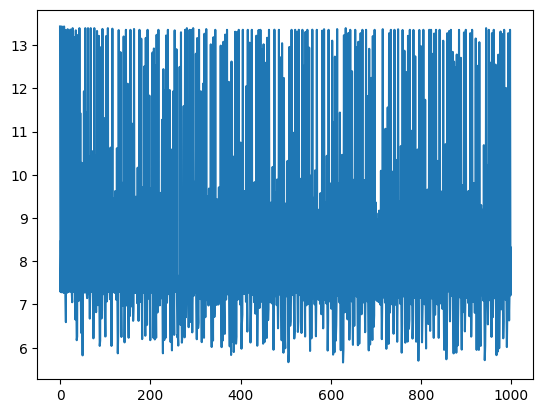

In [228]:
plt.plot(lr.loss)